# Практика

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [173]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# взял https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.semicircular.html#scipy.stats.semicircular
semicircular_rv = sts.semicircular()
sample = semicircular_rv.rvs(1000)
sample

array([-9.97306623e-02, -4.97271094e-01, -2.47607707e-01, -5.99096976e-01,
       -2.88132261e-01,  1.23466871e-01, -2.90232987e-01,  2.61779856e-01,
        7.37098117e-01, -7.05751296e-01, -7.92414607e-01, -2.62479204e-01,
       -2.40994090e-01, -8.54922537e-01,  5.29767608e-02, -8.27699495e-01,
       -1.31487867e-01, -4.25314173e-01, -5.32428454e-01,  8.50076844e-01,
       -1.16385267e-01,  2.56212728e-01, -6.53486056e-02,  8.77081877e-01,
        3.69566681e-01, -5.85819528e-01,  2.85114379e-01,  1.40878378e-01,
        1.69492339e-01, -1.85301283e-01, -8.24716323e-02, -3.01961566e-01,
       -4.08841601e-01, -5.46825321e-01,  3.34829902e-01, -9.07563377e-01,
       -6.68521118e-01,  6.42524577e-01,  4.15951237e-01, -5.99773964e-01,
        6.68585794e-01, -8.30215303e-01,  8.17069744e-01,  7.61966895e-01,
        1.71477456e-01,  2.46256456e-01, -4.02658667e-01, -6.31765550e-01,
        5.61217750e-01,  3.76633887e-01, -4.12215946e-01,  1.56760643e-01,
       -3.66950819e-01, -

In [174]:
sample.dtype

dtype('float64')

In [175]:
real_mean = semicircular_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [176]:
real_var = semicircular_rv.var() # настоящая дисперсия случайной величины
real_var

0.25

### Постройте гистограмму выборки и теоретическую плотность распределения

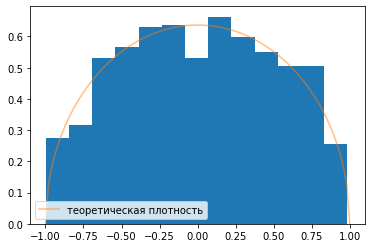

In [177]:
# ваш код тут
plt.hist(sample, density=True, bins='auto')
x = np.linspace(-1,1,100)
pdf = semicircular_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [178]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.008900730172881264
0.25115478844425726


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

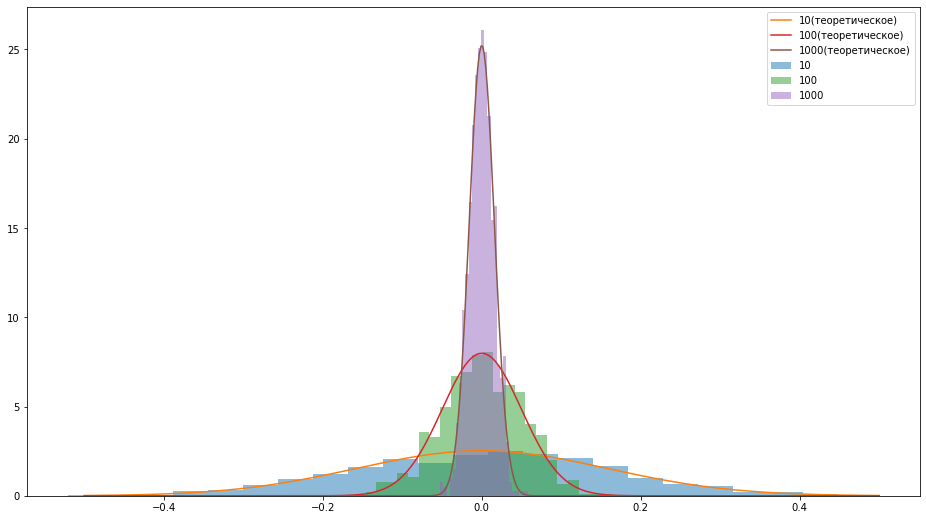

In [179]:
# ваш код тут
plt.figure(figsize=(16,9))
x = np.linspace(-0.5,0.5,500)

# сгенерируем много выборочных средних
for N in [10, 100, 1000]:
    means = []
    for i in range(1000):
         means.append(np.mean(semicircular_rv.rvs(N)))
    norm_rv = sts.norm (loc=real_mean, scale=np.sqrt(real_var / N))
    pdf = norm_rv.pdf(x)
    plt.hist(means, alpha=0.5, density=True, bins='auto', label = N)
    plt.plot(x, pdf, label = str(N)+'(теоретическое)')

plt.legend()
plt.show()

**Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?**

**Ваш ответ: Хорошо, т.к. распределение выборочного среднего близко к нормальному распределению и в целом симметрично**

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [180]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [181]:
data = pd.DataFrame()
data['Среднее'] = df['total day calls'].groupby([df.churn]).mean()
data['Ст.откл.'] = df['total day calls'].groupby([df.churn]).std()
data['N'] = df['total day calls'].groupby([df.churn]).count()
data

,Среднее,Ст.откл.,N
churn,,,
False,100.283158,19.801157,2850
True,101.335404,21.582307,483


Доверительный интервал для среднего по цпт, если нам известна дисперсия

In [182]:
data['Дов.инт.(явная формула) от'] = data['Среднее'] - 1.96 * data['Ст.откл.'] / np.sqrt(data['N']-1)
data['Дов.инт.(явная формула) до'] = data['Среднее'] + 1.96 * data['Ст.откл.'] / np.sqrt(data['N']-1)
data

,Среднее,Ст.откл.,N,Дов.инт.(явная формула) от,Дов.инт.(явная формула) до
churn,,,,,
False,100.283158,19.801157,2850,99.556047,101.010268
True,101.335404,21.582307,483,99.408631,103.262176


Доверительный интервал для среднего по цпт методом _zconfint_generic

In [183]:
data['Дов.инт.(_zconfint_generic) от'] = ssw._zconfint_generic(data['Среднее'],  data['Ст.откл.'], alpha=0.95, alternative='two-sided')[0]
data['Дов.инт.(_zconfint_generic) до'] = ssw._zconfint_generic(data['Среднее'],  data['Ст.откл.'], alpha=0.95, alternative='two-sided')[1]
data

,Среднее,Ст.откл.,N,Дов.инт.(явная формула) от,Дов.инт.(явная формула) до,Дов.инт.(_zconfint_generic) от,Дов.инт.(_zconfint_generic) до
churn,,,,,,,
False,100.283158,19.801157,2850,99.556047,101.010268,99.041491,101.524825
True,101.335404,21.582307,483,99.408631,103.262176,99.982047,102.688761


**Вывод: Оба метода показывают одинаковый результат. Кроме этого кол-во звонков за день не влияет на отток клиентов**